The aim of this analysis is to gain more insights about the role of Data Scientist. As it is a relatively new role compared to other developer roles on the Stachoverflow dataset, there is often not a clear understanding of what this role involves. 

So we are asking the data:

1. What is the background of a data scientist? How is it different from other roles?
We expect that 
a) more data scientists have degrees higher than Bachelor's (Master's or Phds) compared to other developers
b) more data scientist come from non-CS backgrounds than other developers
c) Other education?

2. Is the gender gap smalled in data scientist than other roles?

3. What correlates with higher salary? (years of professional codin experience, education level, country, tools)
Do data scientists get payed more than other roles? Compare each role salary vs years of experience, education
Which tool I neeed to master to be paid more? Which combo of role titles? Does a software engineering background leads to a higher salary compared to an academic background?

4. What correlates with Job satisfaction in Data scientists compared to other roles



In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import numpy as np
import pandas as pd
import time
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from cycler import cycler
plt.style.use('bmh')
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    # We need to turn it to a list because otherwise it returns a Series object!
    desc = list(schema[schema.Column == column_name]['QuestionText'])[0]
    return desc

For the scope of this analysis, we are only interested in professional developers. Therefore we are going to exlude
from the dataset those who are currelntly students which is about 1/4 of the respondents.

In [4]:
df.columns.values

array(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode',
       'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot',
       'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt',
       'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote',
       'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'Bett

In [5]:
print(get_description('Student'))
student_status = df['Student'].value_counts(normalize=True);
print(round(student_status,2))

df = df[df['Student'].str.contains("No",na=False)]
df.shape

Are you currently enrolled in a formal, degree-granting college or university program?
No                0.76
Yes, full-time    0.18
Yes, part-time    0.06
Name: Student, dtype: float64


(65816, 85)

Explore data

In [6]:
# Columns with no missing values

no_nulls = set(df.columns[df.isnull().mean() == 0])
no_nulls

{'Country', 'Hobbyist', 'OpenSourcer', 'Respondent', 'Student'}

In [7]:
df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                  7296
Developer, back-end                                                                                                                                                                                                    4258
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                         2119
Developer, front-end                                                                                                                                                                                                   1889
Developer, back-end;Developer, full-stack                                                                               

In [8]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [9]:
# Clean data for DevType

possible_vals = ["Academic Researcher", "Data or business analyst", "Data scientist or machine learning specialist",
                 "Database administrator", "Designer", "Developer, full-stack", "Developer, back-end", 
                 "Developer, front-end", "Developer, mobile", "Developer, desktop or enterprise applications",
                 "Developer, embedded applications or devices", "Developer, QA or test", "DevOps specialist",
                 "Developer, game or graphics", "Educator", "Engineering manager", "Engineer, data",
                 "Engineer, site reliability", "Marketing or sales professional", "Product manager", "Scientist",
                 "Senior Executive (CSuite, VP, etc.)", "Student", "System administrator", "Other"]

def clean_and_plot(df, column_name, possible_vals, title, plot=True):
    '''
    INPUT 
        df - a dataframe holding the column with the
        column_name - the question
        possible_vals - a list with the possible answers for that question
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        new_df - a dataframe with the percentage of the individuals
        Displays a plot of pretty things related to the DevType column.
    '''
    col = df[column_name].value_counts().reset_index()
    col.rename(columns={'index': 'type', column_name: 'count'}, inplace=True)
    count_df = total_count(col, 'type', 'count', possible_vals)

    count_df.set_index('type', inplace=True)
    if plot:
        (count_df/count_df.sum()).plot(kind='barh', legend=None);
        plt.title(title);
        plt.gca().invert_yaxis()
        plt.show()
    new_df = count_df/count_df.sum()
    new_df.index.name = None
    return new_df

props_df = clean_and_plot(df,'DevType', possible_vals, "Developer Type", plot=False)   

In [10]:
props_df

,count
"Developer, full-stack",0.184025
"Developer, back-end",0.173398
"Developer, front-end",0.112173
"Developer, desktop or enterprise applications",0.073564
"Developer, mobile",0.059114
DevOps specialist,0.040911
Database administrator,0.040337
System administrator,0.037969
Designer,0.036000
"Developer, embedded applications or devices",0.029475


In [11]:
# Edit index of a data frame removing parentheses in order to declutter figures


def remove_parentheses(df):
    '''
    INPUT:
    df - the pandas dataframe you want to edit

    OUTPUT:
    new_df - a dataframe without parentheses in the index
    '''
    for i in range(df.shape[0]):
        value = df.index[i]
        result = re.sub("[\(\[].*?[\)\]]", "", value)
        df = df.rename(index={value : result})
    return df

# graph_df = ed_vals_data.rename('data').to_frame()\
#                .join(ed_vals.rename('all').to_frame())


# for i in range(graph_df.shape[0]):
#     value = graph_df.index[i]
#     result = re.sub("[\(\[].*?[\)\]]", "", value)
#     graph_df = graph_df.rename(index={value : result})

# graph_df

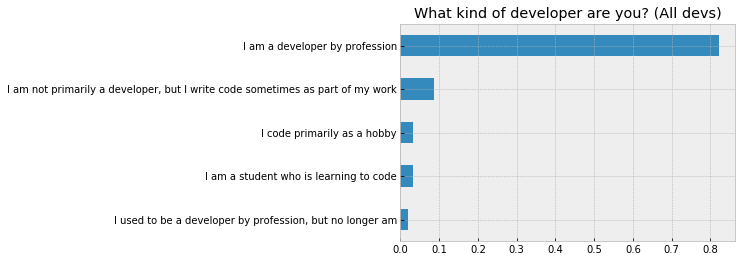

In [12]:
#Provide a pandas series of the counts for each Developer status

status_vals = df['MainBranch'].value_counts();

# The below should be a bar chart of the proportion of individuals in each Developer category if your status_vals
# is set up correctly.
(status_vals/df.shape[0]).plot(kind="barh");
plt.gca().invert_yaxis()
plt.title("What kind of developer are you? (All devs)");


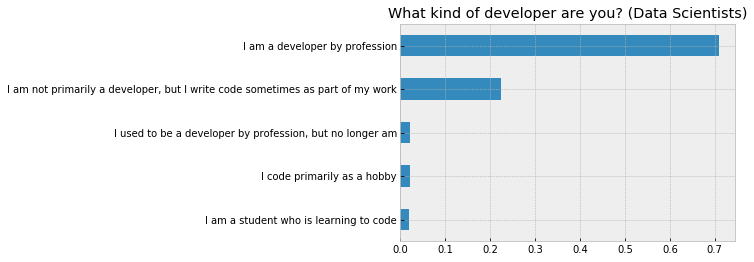

In [13]:
df_data = df[df['DevType'].str.contains("Data ",na=False)]
df_data.shape

status_vals_data = df_data['MainBranch'].value_counts();

# The below should be a bar chart of the proportion of individuals in each Developer category if your status_vals
# is set up correctly.
(status_vals_data/df_data.shape[0]).plot(kind="barh");
plt.gca().invert_yaxis()
plt.title("What kind of developer are you? (Data Scientists)");

In [14]:
def compare(df1, df2, column_name):
    
    vals1 = df1[column_name].value_counts(normalize=True);
    vals2 = df2[column_name].value_counts(normalize=True);

    graph_df = vals1.rename('data').to_frame()\
               .join(vals2.rename('all').to_frame())

    return graph_df


def compare_plot(graph_df, graph_title, parentheses=True):
    
    if(not parentheses):
        graph_df = remove_parentheses(graph_df)
    
    index = np.arange(graph_df.shape[0])
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.barh(index, graph_df['data'], bar_width,
                    label="Data Scientists", color="orange")

    ax.barh(index+bar_width, graph_df['all'],
                     bar_width, label="All Developers")

    ax.set_xlabel('Percentage (%)',fontsize=15)
    ax.set_title(graph_title,fontsize=20)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(graph_df.index)
    ax.tick_params(axis='both', labelsize=15)
    ax.legend(fontsize=15)
    ax.invert_yaxis()
    plt.show()


In [15]:
#Provide a pandas series of the counts for each FormalEducation status

ed_vals_data = df_data['EdLevel'].value_counts(normalize=True);
ed_vals = df['EdLevel'].value_counts(normalize=True);
print("Data Scientists\n")
print(round(ed_vals_data,3))
print("All Developers\n")
print(round(ed_vals,3))

df_edu_data = ed_vals_data.rename_axis('education').reset_index(name='per')
high_edu_data = df_edu_data['per'][1]+df_edu_data['per'][3]
print('{:.2f} % of Data Scientists have an education of Master of above'.format(high_edu_data))
      
df_edu = ed_vals.rename_axis('education').reset_index(name='per')
high_edu = df_edu['per'][1]+df_edu['per'][5]
print('{:.2f} % of All Developers have an education of Master of above'.format(high_edu))      

Data Scientists

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              0.389
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           0.337
Other doctoral degree (Ph.D, Ed.D., etc.)                                             0.104
Some college/university study without earning a degree                                0.084
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.034
Associate degree                                                                      0.024
Professional degree (JD, MD, etc.)                                                    0.016
Primary/elementary school                                                             0.007
I never completed any formal education                                                0.005
Name: EdLevel, dtype: float64
All Developers

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              0.477
Master’s degree (

In [16]:
# graph_df = ed_vals_data.rename('data').to_frame()\
#                .join(ed_vals.rename('all').to_frame())


# graph_df = remove_parentheses(graph_df)

# graph_df.plot(kind="barh");
# plt.title("Formal Education");
# plt.gca().invert_yaxis()
# plt.show()

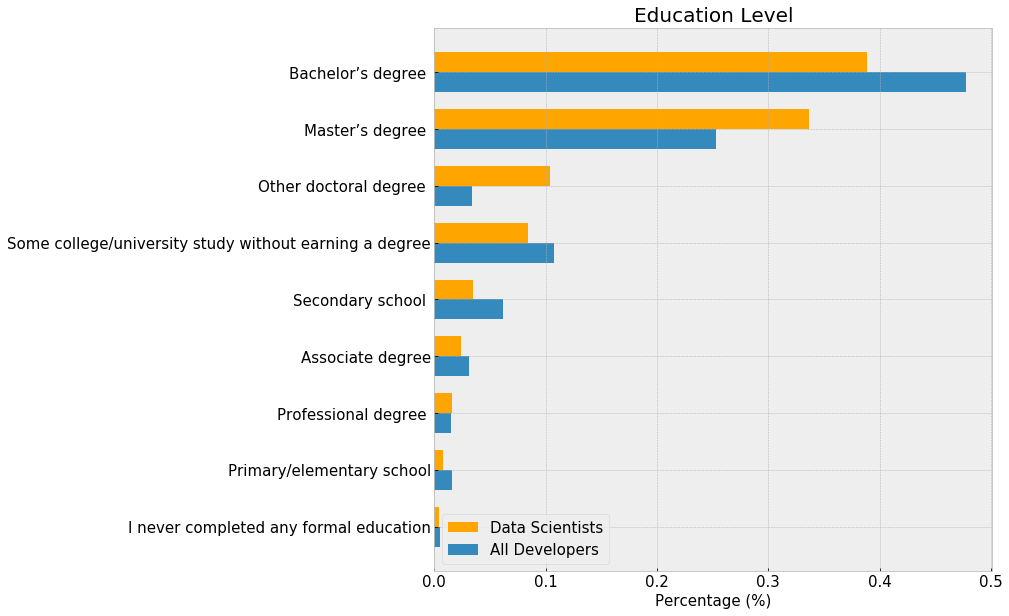

In [17]:
graph_df = compare(df_data, df, 'EdLevel')
compare_plot(graph_df, 'Education Level', parentheses=False)

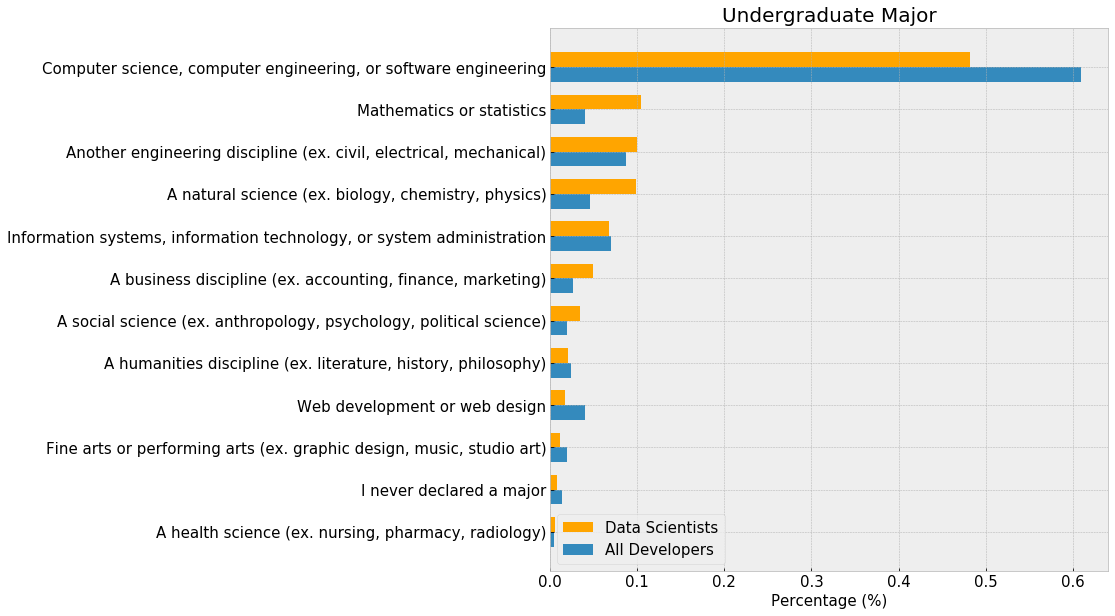

In [18]:
graph_df = compare(df_data, df, 'UndergradMajor')
compare_plot(graph_df, 'Undergraduate Major')

In [19]:
graph_df

,data,all
"Computer science, computer engineering, or software engineering",0.481602,0.609707
Mathematics or statistics,0.104868,0.040503
"Another engineering discipline (ex. civil, electrical, mechanical)",0.099632,0.087745
"A natural science (ex. biology, chemistry, physics)",0.098358,0.045557
"Information systems, information technology, or system administration",0.067365,0.069876
"A business discipline (ex. accounting, finance, marketing)",0.049533,0.025919
"A social science (ex. anthropology, psychology, political science)",0.034673,0.019775
"A humanities discipline (ex. literature, history, philosophy)",0.021228,0.023876
Web development or web design,0.017124,0.040027
"Fine arts or performing arts (ex. graphic design, music, studio art)",0.011463,0.019145


                                                        data       all
Taught yourself a new language, framework, or t...  0.251418  0.264450
Taken an online course in programming or softwa...  0.191558  0.178287
Contributed to open source software                 0.121184  0.129448
Received on-the-job training in software develo...  0.119944  0.127159
Participated in a hackathon                         0.076796  0.077372
Participated in online coding competitions (e.g...  0.074092  0.073027
Taken a part-time in-person course in programmi...  0.063690  0.054407
Completed an industry certification program (e....  0.053476  0.049270
Participated in a full-time developer training ...  0.047843  0.046579


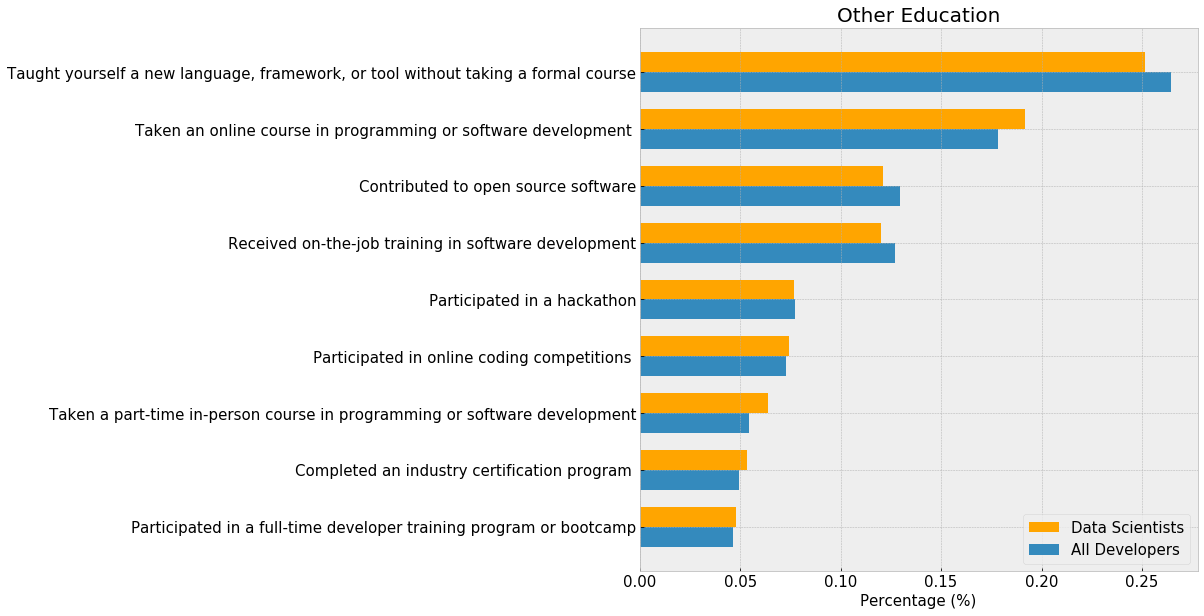

In [20]:
df['EduOther'].value_counts()
possible_values = ["Taught yourself a new language, framework, or tool without taking a formal course",
                   "Taken an online course in programming or software development (e.g. a MOOC)",
                   "Contributed to open source software", "Received on-the-job training in software development",
                   "Participated in a full-time developer training program or bootcamp", "None of these",
                   "Taken a part-time in-person course in programming or software development",
                   "Completed an industry certification program (e.g. MCPD)", "Participated in a hackathon",
                   "Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)"]

props_df = clean_and_plot(df,'EduOther', possible_values, "Other Education",plot=False)
props_df_data = clean_and_plot(df_data,'EduOther', possible_values, "Other Education", plot=False)

props_df_data = props_df_data.rename(columns={"count": "data"})
props_df = props_df.rename(columns={"count": "all"})
graph_df = props_df_data.join(props_df)
print(graph_df)

compare_plot(graph_df, 'Other Education', parentheses=False)
